In [1]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn
from networkx.algorithms import community

In [2]:
synst = wn.synset("travel.v.01")

In [3]:
tr_hyponyms = synst.hyponyms()

In [4]:
syn_names = []
for syn in tr_hyponyms:
    syn_names.append(syn.name())

In [5]:
all_pairs = []
for pair in itertools.combinations(syn_names, r=2): # перебираем все возможные пары
    all_pairs.append(pair)

In [6]:
syn_dict = {}
for pair in all_pairs:
    syn_dict[pair] = 0.0

In [7]:
for lang in wn.langs():
    checked_syns = []
    for syn in tr_hyponyms[:]:
        for word in syn.lemma_names(lang):
            for another_syn in tr_hyponyms[:]:
                if (word in another_syn.lemma_names(lang) and syn != another_syn
                    and another_syn not in checked_syns):
                    syn_dict[(syn.name(), another_syn.name())] += 1
        checked_syns.append(syn)

## Граф

In [8]:
G = nx.Graph()
G.add_nodes_from(syn_names)
for key, value in syn_dict.items():
    if value != 0:
        G.add_edge(key[0], key[1], weight=value)

In [9]:
print("вершин:", G.number_of_nodes())
print("ребер:", G.number_of_edges())

вершин: 123
ребер: 633


In [10]:
weights = [G[u][v]['weight']/10 for u,v in G.edges()]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


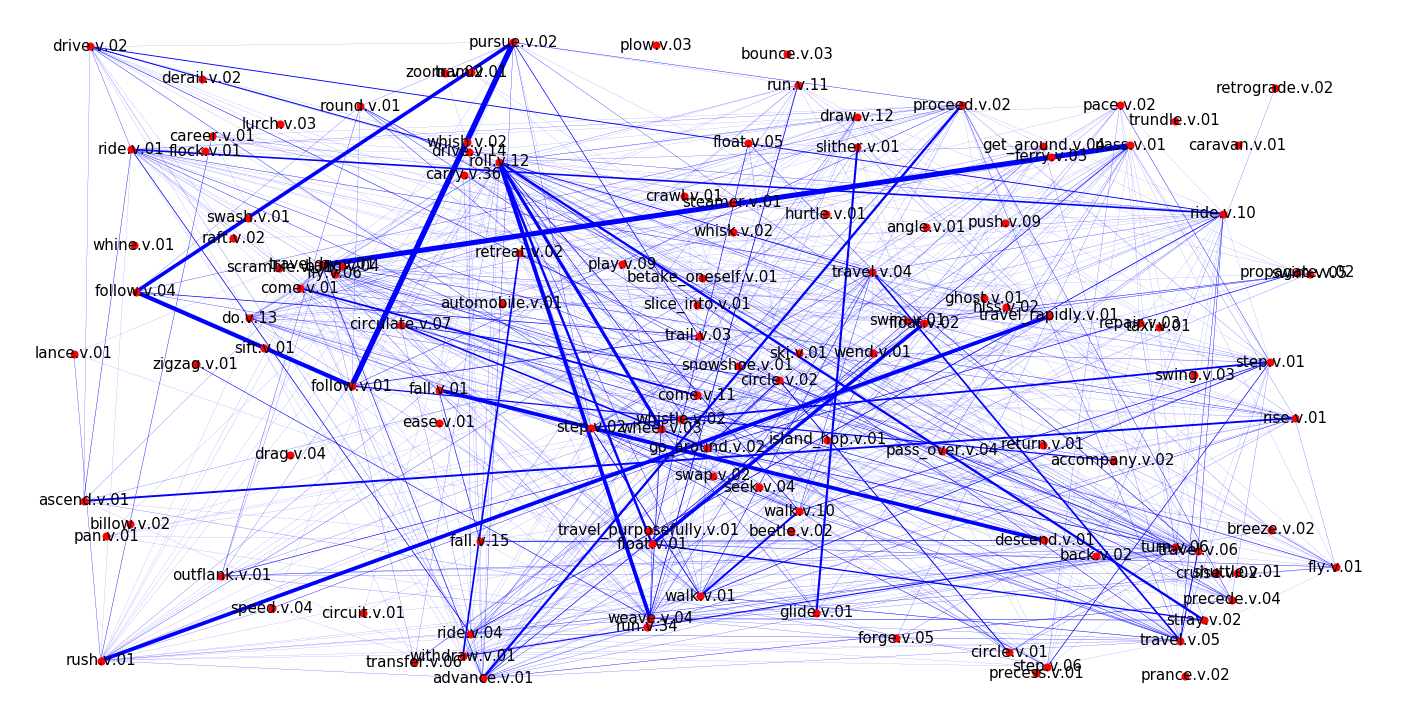

In [11]:
pos=nx.random_layout(G)

plt.figure(figsize=(25,13))
nx.draw_networkx_nodes(G, pos, node_color='red', node_size=50)
nx.draw_networkx_edges(G, pos, edge_color='blue', width=weights)
nx.draw_networkx_labels(G, pos, font_size=15)
plt.axis('off') 
plt.show()

In [12]:
print("Количество связных компонент:", nx.number_connected_components(G))
print("Коэффициент ассортативности:", round(nx.degree_pearson_correlation_coefficient(G), 4))
print("Плотность графа:", round(nx.density(G), 4))

Количество связных компонент: 26
Коэффициент ассортативности: 0.0796
Плотность графа: 0.0844


# Степени вершин

**В топе по разным метрикам располагаются синсеты, в которых больше слов в сравнении с основной массой.**

In [13]:
deg = nx.degree_centrality(G)
for node in sorted(deg, key=deg.get, reverse=True):
    print(node, "\tЗначение:" , round(deg[node], 4), "\tСлов в синсете:", len(wn.synset(node).lemma_names()))

roll.v.12 	Значение: 0.3525 	Слов в синсете: 12
travel_by.v.01 	Значение: 0.2869 	Слов в синсете: 6
advance.v.01 	Значение: 0.2787 	Слов в синсете: 6
travel.v.05 	Значение: 0.2623 	Слов в синсете: 1
do.v.13 	Значение: 0.2541 	Слов в синсете: 1
ride.v.10 	Значение: 0.2541 	Слов в синсете: 1
travel.v.06 	Значение: 0.2459 	Слов в синсете: 2
come.v.01 	Значение: 0.2377 	Слов в синсете: 2
proceed.v.02 	Значение: 0.2377 	Слов в синсете: 3
ride.v.01 	Значение: 0.2377 	Слов в синсете: 2
rush.v.01 	Значение: 0.2377 	Слов в синсете: 12
walk.v.01 	Значение: 0.2377 	Слов в синсете: 1
step.v.02 	Значение: 0.2295 	Слов в синсете: 2
wheel.v.03 	Значение: 0.2295 	Слов в синсете: 2
travel.v.04 	Значение: 0.2213 	Слов в синсете: 2
weave.v.04 	Значение: 0.2213 	Слов в синсете: 5
ride.v.04 	Значение: 0.2131 	Слов в синсете: 1
walk.v.10 	Значение: 0.2131 	Слов в синсете: 2
draw.v.12 	Значение: 0.1967 	Слов в синсете: 1
go_around.v.02 	Значение: 0.1967 	Слов в синсете: 3
pass.v.01 	Значение: 0.1967 	Слов в 

In [14]:
clos = nx.closeness_centrality(G)
for node in sorted(clos, key=clos.get, reverse=True):
    print(node, "\tЗначение:", round(clos[node], 4), "\tСлов в синсете:", len(wn.synset(node).lemma_names()))

roll.v.12 	Значение: 0.4812 	Слов в синсете: 12
travel_by.v.01 	Значение: 0.4606 	Слов в синсете: 6
advance.v.01 	Значение: 0.4551 	Слов в синсете: 6
come.v.01 	Значение: 0.4444 	Слов в синсете: 2
travel.v.05 	Значение: 0.4444 	Слов в синсете: 1
proceed.v.02 	Значение: 0.4418 	Слов в синсете: 3
walk.v.01 	Значение: 0.4418 	Слов в синсете: 1
wheel.v.03 	Значение: 0.4392 	Слов в синсете: 2
ride.v.01 	Значение: 0.4367 	Слов в синсете: 2
ride.v.10 	Значение: 0.4367 	Слов в синсете: 1
rush.v.01 	Значение: 0.4367 	Слов в синсете: 12
travel.v.04 	Значение: 0.4367 	Слов в синсете: 2
weave.v.04 	Значение: 0.4367 	Слов в синсете: 5
do.v.13 	Значение: 0.4341 	Слов в синсете: 1
travel.v.06 	Значение: 0.4341 	Слов в синсете: 2
ride.v.04 	Значение: 0.4292 	Слов в синсете: 1
step.v.02 	Значение: 0.422 	Слов в синсете: 2
draw.v.12 	Значение: 0.4128 	Слов в синсете: 1
go_around.v.02 	Значение: 0.4083 	Слов в синсете: 3
walk.v.10 	Значение: 0.4083 	Слов в синсете: 2
pass.v.01 	Значение: 0.4061 	Слов в с

In [15]:
b = nx.betweenness_centrality(G)
for node in sorted(b, key=b.get, reverse=True):
    print(node, "\tЗначение:", round(b[node], 4), "\tСлов в синсете:", len(wn.synset(node).lemma_names()))

rush.v.01 	Значение: 0.058 	Слов в синсете: 12
roll.v.12 	Значение: 0.0559 	Слов в синсете: 12
advance.v.01 	Значение: 0.0402 	Слов в синсете: 6
proceed.v.02 	Значение: 0.0392 	Слов в синсете: 3
pass.v.01 	Значение: 0.039 	Слов в синсете: 3
travel.v.05 	Значение: 0.0346 	Слов в синсете: 1
wheel.v.03 	Значение: 0.0309 	Слов в синсете: 2
travel_by.v.01 	Значение: 0.0301 	Слов в синсете: 6
weave.v.04 	Значение: 0.0284 	Слов в синсете: 5
travel.v.06 	Значение: 0.027 	Слов в синсете: 2
career.v.01 	Значение: 0.0266 	Слов в синсете: 1
ride.v.10 	Значение: 0.0239 	Слов в синсете: 1
draw.v.12 	Значение: 0.0215 	Слов в синсете: 1
do.v.13 	Значение: 0.0203 	Слов в синсете: 1
go_around.v.02 	Значение: 0.0201 	Слов в синсете: 3
glide.v.01 	Значение: 0.0178 	Слов в синсете: 1
travel_rapidly.v.01 	Значение: 0.0168 	Слов в синсете: 4
walk.v.10 	Значение: 0.0167 	Слов в синсете: 2
wend.v.01 	Значение: 0.0159 	Слов в синсете: 1
descend.v.01 	Значение: 0.0157 	Слов в синсете: 4
float.v.01 	Значение: 0.0

# Сообщества

## Girvan newman

**Данный алгоритм не очень хорошо разбивает граф на сообщества. Выходит одно большое сообщество и много одно- двухэлементных.**

**Первый уровень**

In [16]:
communities = community.girvan_newman(G)
top_level = next(communities)
for i, group in enumerate(top_level):
    print(i+1, group, "\n")

1 {'circle.v.01', 'fly.v.06', 'accompany.v.02', 'betake_oneself.v.01', 'slither.v.01', 'scramble.v.01', 'travel_purposefully.v.01', 'come.v.11', 'round.v.01', 'step.v.02', 'go_around.v.02', 'forge.v.05', 'draw.v.12', 'fall.v.15', 'pan.v.01', 'repair.v.03', 'return.v.01', 'breeze.v.02', 'sift.v.01', 'fall.v.01', 'back.v.02', 'push.v.09', 'circle.v.02', 'travel.v.05', 'crawl.v.01', 'travel_rapidly.v.01', 'roll.v.12', 'withdraw.v.01', 'hurtle.v.01', 'walk.v.10', 'descend.v.01', 'precede.v.04', 'proceed.v.02', 'retrograde.v.02', 'fly.v.01', 'whisk.v.02', 'tram.v.01', 'travel_by.v.01', 'cruise.v.02', 'float.v.02', 'run.v.11', 'pass.v.01', 'float.v.01', 'lance.v.01', 'rise.v.01', 'play.v.09', 'run.v.34', 'shuttle.v.01', 'weave.v.04', 'trail.v.03', 'carry.v.36', 'swim.v.05', 'drive.v.02', 'step.v.06', 'float.v.05', 'ferry.v.03', 'career.v.01', 'step.v.01', 'follow.v.04', 'propagate.v.02', 'swing.v.03', 'rush.v.01', 'transfer.v.06', 'get_around.v.04', 'ascend.v.01', 'glide.v.01', 'drag.v.04', 

**Второй уровень**

In [17]:
sec_level = next(communities)
for i, group in enumerate(sec_level):
    print(i+1, group, "\n")

1 {'circle.v.01', 'fly.v.06', 'accompany.v.02', 'betake_oneself.v.01', 'slither.v.01', 'scramble.v.01', 'travel_purposefully.v.01', 'come.v.11', 'round.v.01', 'step.v.02', 'go_around.v.02', 'forge.v.05', 'draw.v.12', 'fall.v.15', 'pan.v.01', 'repair.v.03', 'return.v.01', 'breeze.v.02', 'sift.v.01', 'fall.v.01', 'back.v.02', 'push.v.09', 'circle.v.02', 'travel.v.05', 'crawl.v.01', 'travel_rapidly.v.01', 'roll.v.12', 'withdraw.v.01', 'hurtle.v.01', 'walk.v.10', 'descend.v.01', 'precede.v.04', 'proceed.v.02', 'fly.v.01', 'whisk.v.02', 'tram.v.01', 'travel_by.v.01', 'cruise.v.02', 'float.v.02', 'run.v.11', 'pass.v.01', 'float.v.01', 'lance.v.01', 'rise.v.01', 'play.v.09', 'run.v.34', 'shuttle.v.01', 'weave.v.04', 'trail.v.03', 'carry.v.36', 'swim.v.05', 'drive.v.02', 'step.v.06', 'float.v.05', 'ferry.v.03', 'career.v.01', 'step.v.01', 'follow.v.04', 'propagate.v.02', 'swing.v.03', 'rush.v.01', 'transfer.v.06', 'get_around.v.04', 'ascend.v.01', 'glide.v.01', 'drag.v.04', 'zigzag.v.01', 'ski

**Третий уровень**

In [18]:
third_level = next(communities)
for i, group in enumerate(third_level):
    print(i+1, group, "\n")

1 {'circle.v.01', 'fly.v.06', 'accompany.v.02', 'betake_oneself.v.01', 'slither.v.01', 'scramble.v.01', 'travel_purposefully.v.01', 'come.v.11', 'round.v.01', 'step.v.02', 'go_around.v.02', 'forge.v.05', 'draw.v.12', 'fall.v.15', 'pan.v.01', 'repair.v.03', 'return.v.01', 'breeze.v.02', 'sift.v.01', 'fall.v.01', 'back.v.02', 'push.v.09', 'circle.v.02', 'travel.v.05', 'crawl.v.01', 'travel_rapidly.v.01', 'roll.v.12', 'withdraw.v.01', 'hurtle.v.01', 'walk.v.10', 'descend.v.01', 'precede.v.04', 'proceed.v.02', 'fly.v.01', 'whisk.v.02', 'tram.v.01', 'travel_by.v.01', 'cruise.v.02', 'float.v.02', 'run.v.11', 'pass.v.01', 'float.v.01', 'lance.v.01', 'rise.v.01', 'play.v.09', 'run.v.34', 'shuttle.v.01', 'weave.v.04', 'trail.v.03', 'carry.v.36', 'swim.v.05', 'drive.v.02', 'step.v.06', 'float.v.05', 'career.v.01', 'step.v.01', 'follow.v.04', 'propagate.v.02', 'swing.v.03', 'rush.v.01', 'transfer.v.06', 'get_around.v.04', 'ascend.v.01', 'glide.v.01', 'drag.v.04', 'zigzag.v.01', 'ski.v.01', 'pursu

## Bipartitions

**Данный алгоритм разделяет граф на два примерно одинаковых подмножества. Не информативный, так как слишком много разнородных элементов.**

In [19]:
for i, group in enumerate(community.kernighan_lin_bisection(G)):
    print(i+1, group, "\n")

1 {'flock.v.01', 'ghost.v.01', 'accompany.v.02', 'bang.v.04', 'ferry.v.03', 'career.v.01', 'slither.v.01', 'travel_purposefully.v.01', 'follow.v.04', 'trundle.v.01', 'zoom.v.02', 'scramble.v.01', 'ease.v.01', 'swing.v.03', 'whish.v.02', 'hiss.v.02', 'whistle.v.02', 'glide.v.01', 'lurch.v.03', 'drag.v.04', 'zigzag.v.01', 'pan.v.01', 'ski.v.01', 'speed.v.04', 'pursue.v.02', 'beetle.v.02', 'breeze.v.02', 'slice_into.v.01', 'sift.v.01', 'billow.v.02', 'snowshoe.v.01', 'push.v.09', 'circuit.v.01', 'crawl.v.01', 'plow.v.03', 'taxi.v.01', 'whine.v.01', 'swap.v.02', 'raft.v.02', 'pass_over.v.04', 'hurtle.v.01', 'angle.v.01', 'bounce.v.03', 'retrograde.v.02', 'whisk.v.02', 'swash.v.01', 'tram.v.01', 'cruise.v.02', 'island_hop.v.01', 'derail.v.02', 'caravan.v.01', 'prance.v.02', 'lance.v.01', 'steamer.v.01', 'play.v.09', 'follow.v.01', 'seek.v.04', 'automobile.v.01', 'shuttle.v.01', 'trail.v.03', 'precess.v.01'} 

2 {'fly.v.06', 'circle.v.01', 'step.v.06', 'float.v.05', 'step.v.01', 'betake_ones

## K-clique

**После подставления разных k (минимальное количество элементов в сообществе) нашлось что-то осмысленное при k=5 и k=6.**

**Здесь в сообщество № 3 собраны фреймы движения по воде, а в сообществе № 2 преследования/сопровождения.**

In [20]:
for i, group in enumerate(community.k_clique_communities(G, 5)):
    print(i+1, group, "\n")

1 frozenset({'come.v.01', 'travel.v.04', 'wend.v.01', 'circle.v.01', 'step.v.06', 'travel_rapidly.v.01', 'roll.v.12', 'swim.v.01', 'withdraw.v.01', 'circulate.v.07', 'walk.v.10', 'descend.v.01', 'betake_oneself.v.01', 'career.v.01', 'step.v.01', 'come.v.11', 'precede.v.04', 'propagate.v.02', 'proceed.v.02', 'swing.v.03', 'rush.v.01', 'drive.v.14', 'round.v.01', 'fly.v.01', 'do.v.13', 'step.v.02', 'go_around.v.02', 'get_around.v.04', 'travel.v.06', 'travel_by.v.01', 'outflank.v.01', 'glide.v.01', 'float.v.02', 'draw.v.12', 'run.v.11', 'pass.v.01', 'fall.v.15', 'ride.v.01', 'pan.v.01', 'float.v.01', 'turn.v.06', 'speed.v.04', 'pursue.v.02', 'retreat.v.02', 'repair.v.03', 'rise.v.01', 'run.v.34', 'ride.v.10', 'fall.v.01', 'weave.v.04', 'pace.v.02', 'carry.v.36', 'circle.v.02', 'travel.v.05', 'ride.v.04', 'advance.v.01', 'walk.v.01', 'wheel.v.03', 'drive.v.02'}) 

2 frozenset({'proceed.v.02', 'accompany.v.02', 'follow.v.01', 'pursue.v.02', 'follow.v.04'}) 

3 frozenset({'proceed.v.02', 'pu

**Здесь в сообщество № 2 в основном предствлены синсеты, в которых в той или иной форме выражено движение по окружности.**

In [21]:
for i, group in enumerate(community.k_clique_communities(G, 6)):
    print(i+1, group, "\n")

1 frozenset({'circle.v.01', 'round.v.01', 'circle.v.02', 'turn.v.06', 'go_around.v.02', 'travel.v.06', 'outflank.v.01'}) 

2 frozenset({'come.v.01', 'travel.v.04', 'wend.v.01', 'step.v.06', 'travel_rapidly.v.01', 'roll.v.12', 'withdraw.v.01', 'circulate.v.07', 'walk.v.10', 'descend.v.01', 'step.v.01', 'come.v.11', 'precede.v.04', 'propagate.v.02', 'proceed.v.02', 'swing.v.03', 'rush.v.01', 'drive.v.14', 'fly.v.01', 'do.v.13', 'step.v.02', 'go_around.v.02', 'get_around.v.04', 'travel.v.06', 'travel_by.v.01', 'draw.v.12', 'run.v.11', 'pass.v.01', 'fall.v.15', 'ride.v.01', 'pan.v.01', 'float.v.01', 'turn.v.06', 'retreat.v.02', 'repair.v.03', 'rise.v.01', 'run.v.34', 'ride.v.10', 'fall.v.01', 'weave.v.04', 'pace.v.02', 'carry.v.36', 'travel.v.05', 'ride.v.04', 'advance.v.01', 'walk.v.01', 'wheel.v.03', 'drive.v.02'}) 

3 frozenset({'rise.v.01', 'float.v.02', 'come.v.01', 'pass.v.01', 'fly.v.01', 'roll.v.12', 'swim.v.01', 'ride.v.01', 'float.v.01', 'travel_by.v.01'}) 

4 frozenset({'roll.v.

**Алгоритм greedy_modularity_communities использовать не получилось, так как он работает только для связных графов.**